In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
# make data set
spends = np.array([2400, 2650, 2350, 4950, 3100, 2500, 5106, 3100, 2900, 1750])
income = np.array([41200, 50100, 52000, 66000, 44500, 37700, 73500, 37500, 56700, 35600])

In [3]:
# make dataframe & calculate
df = pd.DataFrame({'Spends (X)': spends, 'Income (Y)': income}).astype('int64')
df['XY'] = df['Spends (X)'] * df['Income (Y)']
df['X^2'] = df['Spends (X)'] * df['Spends (X)']
df['Y^2'] = df['Income (Y)'] * df['Income (Y)']
df

,Spends (X),Income (Y),XY,X^2,Y^2
0,2400,41200,98880000,5760000,1697440000
1,2650,50100,132765000,7022500,2510010000
2,2350,52000,122200000,5522500,2704000000
3,4950,66000,326700000,24502500,4356000000
4,3100,44500,137950000,9610000,1980250000
5,2500,37700,94250000,6250000,1421290000
6,5106,73500,375291000,26071236,5402250000
7,3100,37500,116250000,9610000,1406250000
8,2900,56700,164430000,8410000,3214890000
9,1750,35600,62300000,3062500,1267360000


In [4]:
# Using Linear Regression Formula
n = len(df)
a = (df['Income (Y)'].sum() * df['X^2'].sum() - df['Spends (X)'].sum() * df['XY'].sum()) / (
        n * df['X^2'].sum() - df['Spends (X)'].sum() * df['Spends (X)'].sum())
b = (n * df['XY'].sum() - df['Spends (X)'].sum() * df['Income (Y)'].sum()) / (
        n * df['X^2'].sum() - df['Spends (X)'].sum() * df['Spends (X)'].sum())

print("y = a + bx\na : " + str(a) + "\nb : " + str(b))

y = a + bx
a : 19370.109089952737
b : 9.774034574448894


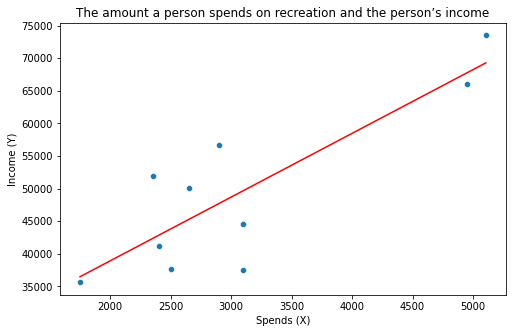

In [5]:
# Show data & linear regression
ax_ = plt.figure(figsize=(8, 5))
plt.title('The amount a person spends on recreation and the person’s income')

x_ = df['Spends (X)']
y_ = df['Income (Y)']
sns.scatterplot(x='Spends (X)', y='Income (Y)', data=df)

px_ = np.linspace(x_.min(), x_.max())
py_ = a + b * px_
plt.plot(px_, py_, color='r')

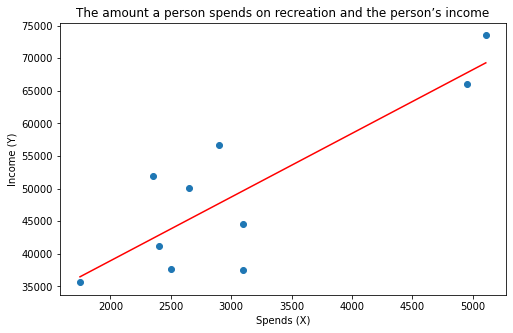

In [6]:
ax = plt.figure(figsize=(8, 5))

x = spends
y = income
plt.plot(x, y, 'o')

reg = linear_model.LinearRegression()
reg.fit(x[:, np.newaxis], y)

px = np.array([x.min() - 1, x.max() + 1])
py = reg.predict(px[:, np.newaxis])

plt.title('The amount a person spends on recreation and the person’s income')
plt.xlabel("Spends (X)")
plt.ylabel("Income (Y)")

plt.plot(px, py, color='r')